
DATASET USED FOR Q1:
 https://www.kaggle.com/datasets/robmarkcole/occupancy-detection-data-set-uci


***TASK 1 : ***

Occupancy dataset contains four attributes i-e "Humidity, Light, CO2 and Humidity ratio".

• Apply KNN to find if occupancy is possible or not (0 or 1) based on "Humidity,
Light and Humidity Ratio" only. Train on "Occupancy_train.txt" and Test on
"Occupancy_test.txt". You need to do the following then :

• Run this KNN Algorithm for n_neighbors (K) from 1 to 10. You will get 10 different accuracies.Print all the accuracies. Then print the highest accuracy and also the value of K at which you got the highest accuracy.

In [ ]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
train_data = pd.read_csv("/content/datatraining.txt", delimiter=",")
test_data = pd.read_csv("/content/datatest.txt", delimiter=",")

In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')
Index(['date', 'Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio',
       'Occupancy'],
      dtype='object')


In [ ]:
train_data.columns = ["date", "Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Occupancy"]
test_data.columns = ["date", "Temperature", "Humidity", "Light", "CO2", "HumidityRatio", "Occupancy"]

In [ ]:
X_train = train_data[["Humidity", "Light", "HumidityRatio"]]
y_train = train_data["Occupancy"]

X_test = test_data[["Humidity", "Light", "HumidityRatio"]]
y_test = test_data["Occupancy"]

In [ ]:
accuracies = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((k, accuracy))
    print(f"K={k}, Accuracy in 4 significant figures ={accuracy:.4f}")

K=1, Accuracy in 4 significant figures =0.9403
K=2, Accuracy in 4 significant figures =0.9253
K=3, Accuracy in 4 significant figures =0.9572
K=4, Accuracy in 4 significant figures =0.9448
K=5, Accuracy in 4 significant figures =0.9553
K=6, Accuracy in 4 significant figures =0.9527
K=7, Accuracy in 4 significant figures =0.9632
K=8, Accuracy in 4 significant figures =0.9614
K=9, Accuracy in 4 significant figures =0.9647
K=10, Accuracy in 4 significant figures =0.9647


In [ ]:
best_k, best_accuracy = max(accuracies, key=lambda x: x[1])
print(f"\nBest Accuracy: {best_accuracy:.4f} at K={best_k}")


Best Accuracy: 0.9647 at K=9


***TASK 2 :***

Now instead of using built-in library, write your own code for kNN classifier from scratch. Run on iris dataset. Use 80/20 split. Print accuracy and confusion matrix at the end. You must use the following chi squared distance function :

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def chi_squared_distance(x1, x2):
    return np.sum((x1 - x2) ** 2 / (x1 + x2 + 1e-10)) # small value added to avoid division by zero

In [ ]:
def knn_predict(X_train, y_train, X_test, k):
    y_pred = []
    for test_point in X_test:
        distances = []
        for i, train_point in enumerate(X_train):
            distance = chi_squared_distance(test_point, train_point)
            distances.append((distance, y_train[i]))
        distances.sort(key=lambda x: x[0])
        k_nearest_neighbors = [label for _, label in distances[:k]]
        most_common = max(set(k_nearest_neighbors), key=k_nearest_neighbors.count)
        y_pred.append(most_common)
    return np.array(y_pred)

In [ ]:
k = 3

In [ ]:
y_pred = knn_predict(X_train, y_train, X_test, k)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [ ]:
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


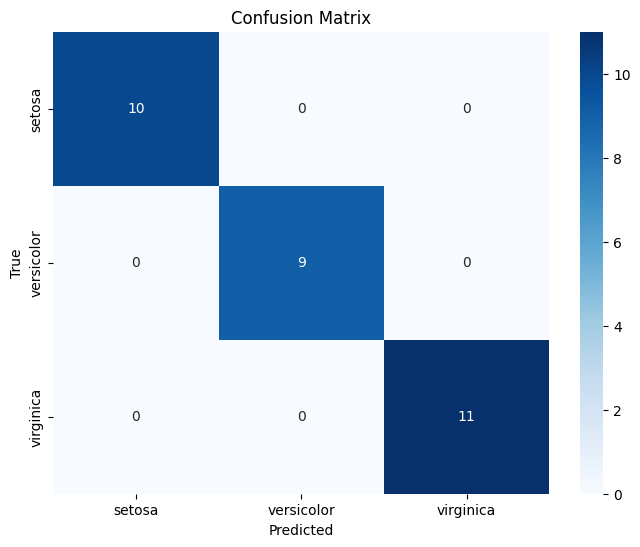

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

***TASK 3 :***

Download the dataset:

• Perform EDA

• Check the dataset is balance or not (using target variable “Label”)

• Check whether there is any empty records, categorical feature, duplicate records, if yes then handle this and give a brief explanation why you have chosen this technique in a text cell or “jupyter/colab”

• Check the correlation of your dataset and perform feature selection using Pearson Correlation

• Analyze your dataset and think if feature scaling is required or not? If yes then apply any scaling technique based on your distribution.

• Split your dataset in training , testing and validation. Train split will be 80% and test will be 20% . In validation split your training samples will be 70% and validation set will be 30%. Briefly describe why we use validation set in a text cell. Declare Random_state=0

• Apply KNN and check model training and testing accuracy.

• Compare the accuracies by trying different metrics, combine all the training and testing accuracies of Euclidean, Manhattan etc. to compare their performance. Make a critical analysis what you have observed and where we have used different metrics?

• Apply KNN and check model training and testing accuracy.

• Compare the accuracies by trying different algorithms, combine all the training and testing accuracies of auto, KDTress , brute etc. to compare their performance. Do analyze what you have observed and where we have used different algorithms? What is the impact of changing algorithm on accuracy and testing time?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv('/content/cancer patient data sets.csv')

In [ ]:
data.columns = ["index", "Patient Id", "Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy",
                "Occupational Hazards", "Genetic Risk", "Chronic Lung Disease", "Balanced Diet", "Obesity",
                "Smoking", "Passive Smoker", "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss",
                "Shortness of Breath", "Wheezing", "Swallowing Difficulty", "Clubbing of Finger Nails",
                "Frequent Cold", "Dry Cough", "Snoring", "Level"]

In [ ]:
print("First few rows of the dataset:")
print(data.head())

print("\nData summary:")
print(data.describe())

print("\nChecking for missing values:")
print(data.isnull().sum())

print("\nChecking for duplicates:")
print(f"Number of duplicate rows: {data.duplicated().sum()}")

First few rows of the dataset:
   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       0              2            4             5   
1      1        P10   17       0              3            1             5   
2      2       P100   35       0              4            5             6   
3      3      P1000   37       0              7            7             7   
4      4       P101   46       0              6            8             7   

   Occupational Hazards  Genetic Risk  Chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  

In [ ]:
data = data.drop_duplicates()


Value counts of target variable 'Level':
Level
0    365
2    332
1    303
Name: count, dtype: int64


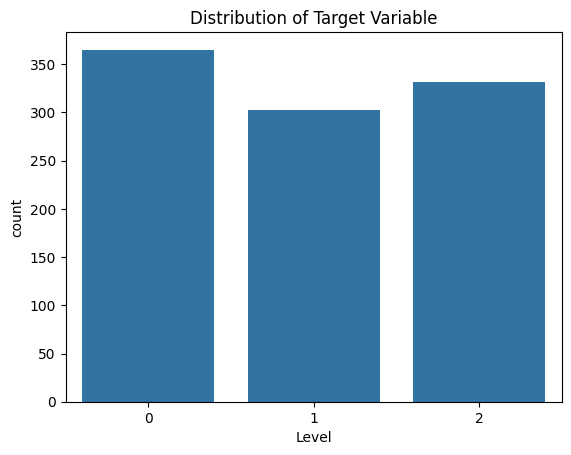

In [ ]:
print("\nValue counts of target variable 'Level':")
print(data['Level'].value_counts())

sns.countplot(x='Level', data=data)
plt.title('Distribution of Target Variable')
plt.show()

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Level'] = label_encoder.fit_transform(data['Level'])
correlation_matrix = data.drop(columns=['Patient Id']).corr()

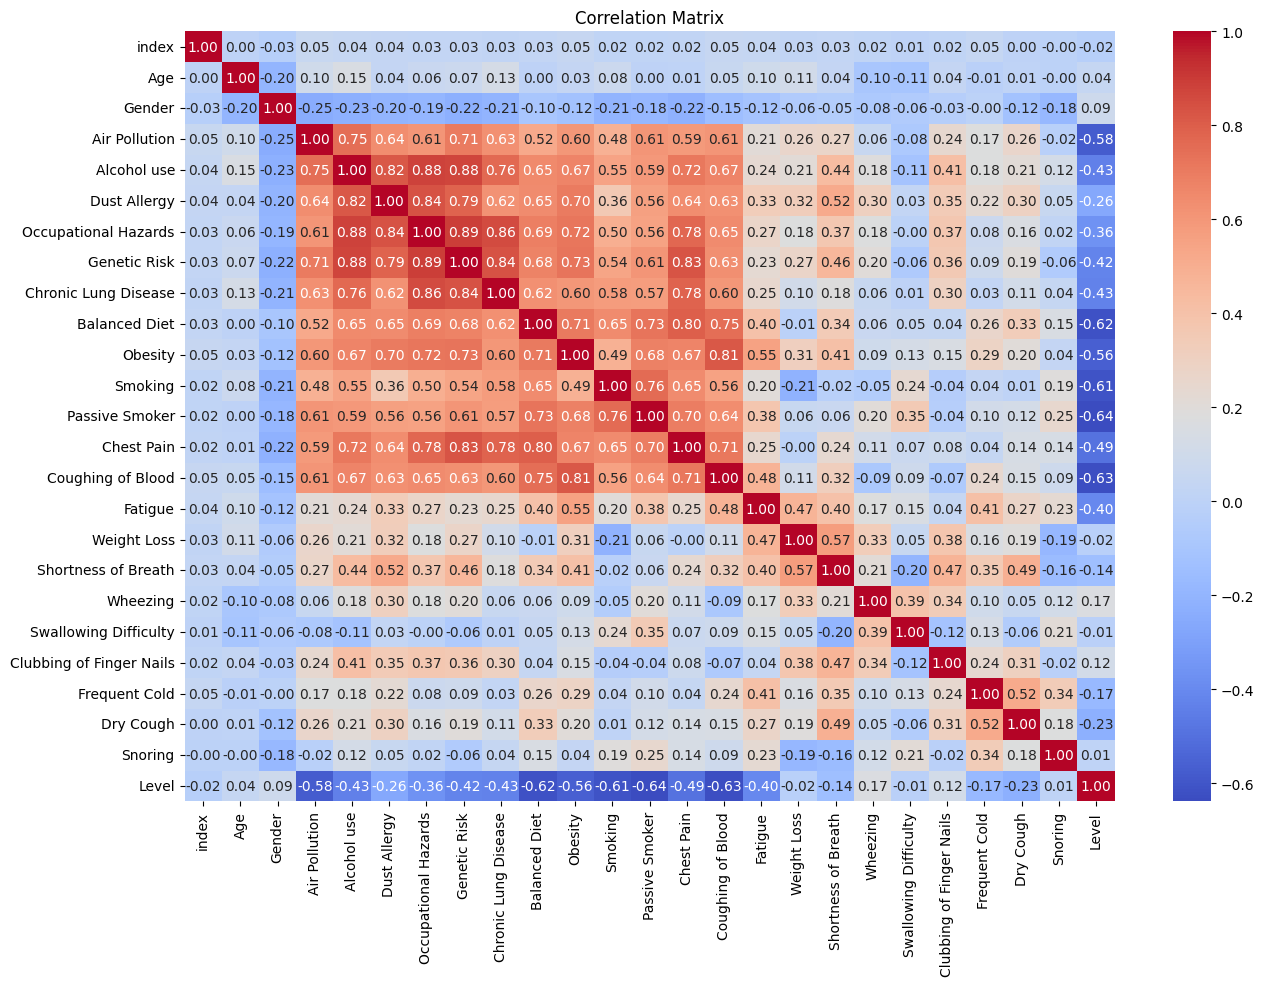

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
correlations = {}
for col in data.columns:
    if col != "Level" and np.issubdtype(data[col].dtype, np.number):
        correlations[col] = pearsonr(data[col], data['Level'])[0]

In [ ]:
sorted_correlations = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
print("\nFeatures sorted by correlation with target variable:")
for feature, corr in sorted_correlations:
    print(f"{feature}: {corr:.4f}")


Features sorted by correlation with target variable:
Passive Smoker: -0.6384
Coughing of Blood: -0.6311
Balanced Diet: -0.6188
Smoking: -0.6111
Air Pollution: -0.5773
Obesity: -0.5620
Chest Pain: -0.4947
Alcohol use: -0.4341
Chronic Lung Disease: -0.4324
Genetic Risk: -0.4234
Fatigue: -0.4033
Occupational Hazards: -0.3637
Dust Allergy: -0.2649
Dry Cough: -0.2287
Frequent Cold: -0.1717
Wheezing: 0.1678
Shortness of Breath: -0.1402
Clubbing of Finger Nails: 0.1167
Gender: 0.0862
Age: 0.0426
index: -0.0246
Weight Loss: -0.0205
Snoring: 0.0143
Swallowing Difficulty: -0.0129


In [ ]:
scaler = StandardScaler()
scaled_features = data.copy()
scaled_features[["Age", "Air Pollution", "Alcohol use", "Dust Allergy", "Occupational Hazards", "Genetic Risk",
                 "Chronic Lung Disease", "Balanced Diet", "Obesity", "Smoking", "Passive Smoker", "Chest Pain",
                 "Coughing of Blood", "Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing",
                 "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold", "Dry Cough", "Snoring"]] = scaler.fit_transform(
    data[["Age", "Air Pollution", "Alcohol use", "Dust Allergy", "Occupational Hazards", "Genetic Risk",
          "Chronic Lung Disease", "Balanced Diet", "Obesity", "Smoking", "Passive Smoker", "Chest Pain",
          "Coughing of Blood", "Fatigue", "Weight Loss", "Shortness of Breath", "Wheezing",
          "Swallowing Difficulty", "Clubbing of Finger Nails", "Frequent Cold", "Dry Cough", "Snoring"]])

In [ ]:
X = scaled_features.drop(columns=["index", "Patient Id", "Level"])
y = data["Level"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.30, random_state=0)

print("\nTraining set size:", X_train.shape)
print("Validation set size:", X_val.shape)
print("Test set size:", X_test.shape)


Training set size: (560, 23)
Validation set size: (240, 23)
Test set size: (200, 23)


In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
train_accuracy = knn.score(X_train, y_train)
val_accuracy = knn.score(X_val, y_val)
test_accuracy = knn.score(X_test, y_test)

print("\nTraining Accuracy:", train_accuracy)
print("Validation Accuracy:", val_accuracy)
print("Test Accuracy:", test_accuracy)


Training Accuracy: 1.0
Validation Accuracy: 1.0
Test Accuracy: 1.0


In [ ]:
y_pred_test = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred_test)
print("\nConfusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[75  0  0]
 [ 0 67  0]
 [ 0  0 58]]


In [ ]:
metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
results = {}

for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    results[metric] = (train_acc, test_acc)

print("\nComparison of different metrics:")
for metric, (train_acc, test_acc) in results.items():
    print(f"Metric: {metric}, Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")


Comparison of different metrics:
Metric: euclidean, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
Metric: manhattan, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
Metric: chebyshev, Training Accuracy: 0.9964, Testing Accuracy: 0.9900
Metric: minkowski, Training Accuracy: 1.0000, Testing Accuracy: 1.0000


In [ ]:
algorithms = ['auto', 'kd_tree', 'ball_tree', 'brute']
algo_results = {}

for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
    knn.fit(X_train, y_train)
    train_acc = knn.score(X_train, y_train)
    test_acc = knn.score(X_test, y_test)
    algo_results[algo] = (train_acc, test_acc)

print("\nComparison of different algorithms:")
for algo, (train_acc, test_acc) in algo_results.items():
    print(f"Algorithm: {algo}, Training Accuracy: {train_acc:.4f}, Testing Accuracy: {test_acc:.4f}")


Comparison of different algorithms:
Algorithm: auto, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
Algorithm: kd_tree, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
Algorithm: ball_tree, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
Algorithm: brute, Training Accuracy: 1.0000, Testing Accuracy: 1.0000
